In [130]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode

In [8]:
#enable offline mode for plotly
init_notebook_mode(connected=True)

In [12]:
df = pd.read_csv('nba-players-stats-2324/nba-player-data.csv')

In [13]:
#display first few rows
df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6


In [15]:
#dataset shape and dupe check
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Dataset has 736 rows and 30 columns.
Number of duplicate rows: 0


In [16]:
#renaming colums for better readability
df.rename(columns={
    'PName': 'Player_Name', 'POS': 'Position', 'Team': 'Team_Abbreviation', 'Age': 'Age',
    'GP': 'Games_Played', 'W': 'Wins', 'L': 'Losses', 'Min': 'Minutes_Played',
    'PTS': 'Total_Points', 'FGM': 'Field_Goals_Made', 'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage', '3PM': 'Three_Point_FG_Made', '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage', 'FTM': 'Free_Throws_Made', 'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage', 'OREB': 'Offensive_Rebounds', 'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds', 'AST': 'Assists', 'TOV': 'Turnovers', 'STL': 'Steals',
    'BLK': 'Blocks', 'PF': 'Personal_Fouls', 'FP': 'NBA_Fantasy_Points', 'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles', '+/-': 'Plus_Minus'}, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Rk                         736 non-null    object
 1   Player                     736 non-null    object
 2   Pos                        736 non-null    object
 3   Age                        736 non-null    object
 4   Tm                         736 non-null    object
 5   G                          736 non-null    object
 6   GS                         736 non-null    object
 7   MP                         736 non-null    object
 8   FG                         736 non-null    object
 9   Field_Goals_Attempted      736 non-null    object
 10  Field_Goal_Percentage      728 non-null    object
 11  3P                         736 non-null    object
 12  Three_Point_FG_Attempted   736 non-null    object
 13  Three_Point_FG_Percentage  690 non-null    object
 14  2P        

In [21]:
if df.select_dtypes(include=[np.number]).shape[1] > 0:
    print(df.describe(include=[np.number]))

if df.select_dtypes(include=['object']).shape[1] > 0:
    print(df.describe(include=['object']))
else:
    print("no object-type columns")

         Rk          Player  Pos  Age   Tm    G   GS   MP   FG  \
count   736             736  736  736  736  736  736  736  736   
unique  573             573   13   22   32   84   83  310   98   
top     295  Kira Lewis Jr.   SF   24  TOT   68    0  3.0  1.5   
freq      4               4  155   94   78   18  253    9   29   

       Field_Goals_Attempted  ... Free_Throw_Percentage  ORB  DRB  TRB  \
count                    736  ...                   677  736  736  736   
unique                   171  ...                   273   40   79  103   
top                      3.5  ...                 1.000  0.3  1.5  1.8   
freq                      16  ...                    41   73   30   26   

       Assists Steals Blocks Turnovers Personal_Fouls Total_Points  
count      736    736    736       736            736          736  
unique      82     22     25        40             36          210  
top        1.3    0.5    0.1       0.3            1.0          4.0  
freq        35     81 

In [22]:
missing_values = df.isna().sum()
if missing_values.any():
    print("missing values per column:\n", missing_values)
else:
    print("no missing vals")

missing values per column:
 Rk                            0
Player                        0
Pos                           0
Age                           0
Tm                            0
G                             0
GS                            0
MP                            0
FG                            0
Field_Goals_Attempted         0
Field_Goal_Percentage         8
3P                            0
Three_Point_FG_Attempted      0
Three_Point_FG_Percentage    46
2P                            0
2PA                           0
2P%                          13
eFG%                          8
FT                            0
Free_Throws_Attempted         0
Free_Throw_Percentage        59
ORB                           0
DRB                           0
TRB                           0
Assists                       0
Steals                        0
Blocks                        0
Turnovers                     0
Personal_Fouls                0
Total_Points                  0
dtype: int64

In [25]:
#replace missing values in percentage columns w/ 0
df['Field_Goal_Percentage'].fillna(0, inplace=True)
df['Three_Point_FG_Percentage'].fillna(0, inplace=True)
df['2P%'].fillna(0, inplace=True)
df['eFG%'].fillna(0, inplace=True)
df['Free_Throw_Percentage'].fillna(0, inplace=True)

In [34]:
#convert categorical columns to 'category' dtype for optimization
df['Player'] = df['Player'].astype('category')
df['Pos'] = df['Pos'].astype('category')
df['Tm'] = df['Tm'].astype('category')

#convert int columns to int type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
print(df['Age'].isna().sum())

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = df['Age'].astype(int)

df['G'] = pd.to_numeric(df['G'], errors='coerce')
print(df['G'].isna().sum())

df['G'].fillna(df['G'].median(), inplace=True)
df['G'] = df['G'].astype(int)

df['GS'] = pd.to_numeric(df['GS'], errors='coerce')
print(df['GS'].isna().sum())

df['GS'].fillna(df['GS'].median(), inplace=True)
df['GS'] = df['GS'].astype(int)
print(df.info)

0
1
1
<bound method DataFrame.info of       Rk            Player   Pos  Age   Tm   G  GS    MP   FG  \
0      1  Precious Achiuwa  PF-C   24  TOT  74  18  21.9  3.2   
1      1  Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   
2      1  Precious Achiuwa    PF   24  NYK  49  18  24.2  3.2   
3      2       Bam Adebayo     C   26  MIA  71  71  34.0  7.5   
4      3      Ochai Agbaji    SG   23  TOT  78  28  21.0  2.3   
..   ...               ...   ...  ...  ...  ..  ..   ...  ...   
731  568    Thaddeus Young    PF   35  PHO  10   0   8.9  1.1   
732  569        Trae Young    PG   25  ATL  54  54  36.0  8.0   
733  570    Omer Yurtseven     C   25  UTA  48  12  11.4  2.1   
734  571       Cody Zeller     C   31  NOP  43   0   7.4  0.6   
735  572       Ivica Zubac     C   26  LAC  68  68  26.4  5.0   

    Field_Goals_Attempted  ... Free_Throw_Percentage  ORB  DRB   TRB Assists  \
0                     6.3  ...                  .616  2.6  4.0   6.6     1.3   
1                    

In [38]:
#filling missing values for position
df['Pos'].fillna('SG', inplace=True)

In [41]:
df = df[df['Rk'].apply(lambda x: str(x).isdigit())]
df['Rk'] = df['Rk'].astype(int)

In [42]:
#visualization of players by position
px.histogram(df, x='Pos', color_discrete_sequence=px.colors.qualitative.Vivid,
             title='Players By Position',  template='plotly_dark').show()

In [72]:
# clean dataframe to remove any rows with NaN in 'Pos'
df = df[df['Pos'].notna()]

#define a mapping for composite positions to standardize them
position_mapping = {
    'PG': 'G',
    'SG': 'G',
    'SG-PG': 'G',
    'SF': 'F',
    'PF': 'F',
    'PF-SF': 'F',
    'C': 'C',
    'C-PF': 'C',
    'PF-C': 'C',
    'SF-SG': 'F',
    'PG-SG': 'G',
    'PF-SG': 'F',
    'SF-PF': 'F'
}

df['Standard_Pos'] = df['Pos'].replace(position_mapping)
df = df[df['Standard_Pos'].notna()]
position_stats = df.groupby(['Standard_Pos']).agg({'Total_Points': 'mean'}).reset_index()
position_stats = position_stats[position_stats['Total_Points'].notna()]
position_stats.sort_values(by='Total_Points', ascending=False, inplace=True)

print(position_stats)

  Standard_Pos  Total_Points
2            G      8.416340
1            F      7.752614
0            C      7.713008


In [74]:
fig = px.bar(position_stats,
             x='Standard_Pos',
             y='Total_Points',
             color='Total_Points',
             color_continuous_scale=px.colors.sequential.Viridis,
             title='Average Total Points by Position',
             labels={'Standard Pos': 'Position', 'Total_Points': 'Average Total Points'},
             template='plotly_dark')

fig.show()

In [83]:
#visualization of age distribution and scatter plots for age vs stats
def plot_histogram_and_scatter(df):
    #histogram for age distribution
    fig_age_histogram = go.Figure()
    fig_age_histogram.add_trace(go.Histogram(x=df['Age'], marker_color='orangered'))
    fig_age_histogram.update_layout(title='Distribution of Player Ages', xaxis_title='Age', yaxis_title='Count', template='plotly_dark')
    fig_age_histogram.show()

    #scatter plots for age vs different stats
    scatter_plots = [
        ('Total_Points', 'Total Points'),
        ('Field_Goal_Percentage', 'Field Goal Percentage'),
        ('Assists', 'Assists')
    ]

    for y_val, label in scatter_plots:
        fig = px.scatter(df, x='Age', y=y_val, color='Pos',
                         title=f'Player Age vs {label}',
                         labels={'Age': 'Age', y_val: label}, template='plotly_dark')
        
        fig.show()

plot_histogram_and_scatter(df)

In [93]:
#convert relevant objects colums to numeric
numeric_columns = [
    'MP', 'FG', 'Field_Goals_Attempted', 'Field_Goal_Percentage',
    '3P', 'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage',
    '2P', '2PA', '2P%', 'eFG%', 'FT', 'Free_Throws_Attempted',
    'Free_Throw_Percentage', 'ORB', 'DRB', 'TRB', 'Assists',
    'Steals', 'Blocks', 'Turnovers', 'Personal_Fouls'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#box plot for numeric columns
def plot_box_plots(df):
    columns_to_plot = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'Total_Points']

    if not columns_to_plot:
        print("No numeric columns to plot")
        return
    
    num_columns = len(columns_to_plot)
    num_rows = (num_columns + 1) // 2

    fig,axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), dpi=300)
    colors = sns.color_palette("Set3", num_columns)
    
    for i, column in enumerate(columns_to_plot):
        row = i // 2
        col = i % 2
        sns.boxplot(x=df[column], ax=axes[row, col], color=colors[i])
        axes[row, col].set_title(f'Box Plot of {column}')

    plt.tight_layout()
    plt.show()

#call function to plot
plot_box_plots(df)

In [97]:
#outlier handling (remove extreme cases)
outlier_conditions = (
    (df['Field_Goal_Percentage'] > 90) | (df['Field_Goal_Percentage'] == 0) |
    (df['Three_Point_FG_Percentage'] > 90) | (df['Three_Point_FG_Percentage'] == 0) |
    (df['Free_Throw_Percentage'] == 0)
)
df = df[~outlier_conditions]

In [101]:
#select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int32'])
corr_matrix = numeric_cols.corr()

#create heatmap
fig = go.Figure(data=go.Heatmap(
    z = corr_matrix.values,
    x = corr_matrix.columns,
    y = corr_matrix.index,
    colorscale = 'Oranges'
))

#update layout
fig.update_layout(
    title = 'Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    height = 1500,
    template = 'plotly_dark'
)

fig.show()

In [104]:
#dropping columns irrelevant for prediction
df.drop(columns=['Player', 'Pos', 'Tm', 'FG', 'Field_Goals_Attempted',
                 '3P', 'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage', 
                 'Free_Throws_Attempted', 'ORB', 'DRB'], inplace=True)

In [105]:
#splitting data into features and target
x =  df.drop('Total_Points', axis=1)
y = df['Total_Points']

In [107]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [108]:
#function to evaluate multiple models
def evaluate_model(ModelClass, param_grid=None):
    model = ModelClass()

    #hyperparam tuning with GridSearchCV if param_grid is provided
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {ModelClass.__name__}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_model = model
    
    #predictions and r^2 score
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 score for {ModelClass.__name__}: {r2}")
    return best_model

In [128]:
# Apply one-hot encoding to 'Standard_Pos' (since 'Pos' is no longer present)
df_encoded = pd.get_dummies(df, columns=['Standard_Pos'], drop_first=True)

# Check the encoded DataFrame
print(df_encoded.head())

   Rk  Age   G  GS    MP  Field_Goal_Percentage   2P   2PA    2P%   eFG%  ...  \
0   1   24  74  18  21.9                  0.501  2.8   5.0  0.562  0.529  ...   
1   1   24  25   0  17.5                  0.459  2.6   4.9  0.528  0.497  ...   
2   1   24  49  18  24.2                  0.525  2.9   5.1  0.578  0.547  ...   
3   2   26  71  71  34.0                  0.521  7.3  13.7  0.528  0.529  ...   
4   3   23  78  28  21.0                  0.411  1.5   2.8  0.523  0.483  ...   

    TRB  Assists  Steals  Blocks  Turnovers  Personal_Fouls  Total_Points  \
0   6.6      1.3     0.6     0.9        1.1             1.9           7.6   
1   5.4      1.8     0.6     0.5        1.2             1.6           7.7   
2   7.2      1.1     0.6     1.1        1.1             2.1           7.6   
3  10.4      3.9     1.1     0.9        2.3             2.2          19.3   
4   2.8      1.1     0.6     0.6        0.8             1.5           5.8   

   Standard_Pos_F  Standard_Pos_G  Standard_Pos_Po

In [131]:
df_model = df_encoded.drop(columns=['Rk'])

#features and target variable
x = df_model.drop(columns=['Total_Points'])
y = df_model['Total_Points']

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.290942605210206
R-squared: 0.9710540754389564


In [132]:
# Define parameter grid
knn_param_grid = {
    'n_neighbors': range(3, 11, 2),  # test odd values of neighbors from 3 to 11
    'weights': ['uniform', 'distance'],  # weight function
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Setup GridSearchCV for KNN
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
knn_grid_search.fit(X_train, y_train)

# Get the best KNN model
knn_best = knn_grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_knn = knn_best.predict(X_test)
print(f"KNN Best Params: {knn_grid_search.best_params_}")
print(f"KNN Mean Squared Error: {mean_squared_error(y_test, y_pred_knn)}")
print(f"KNN R-squared: {r2_score(y_test, y_pred_knn)}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
KNN Mean Squared Error: 5.3874300533699655
KNN R-Squared: 0.8792013345338822


In [136]:
# Define parameter grid
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],  # try different depths
    'min_samples_split': [2, 10, 20]  # minimum samples required to split a node
}

# Initialize Decision Tree regressor
tree = DecisionTreeRegressor()

# Setup GridSearchCV for Decision Tree
tree_grid_search = GridSearchCV(tree, tree_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
tree_grid_search.fit(X_train, y_train)

# Get the best Decision Tree model
tree_best = tree_grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tree = tree_best.predict(X_test)
print(f"Decision Tree Best Params: {tree_grid_search.best_params_}")
print(f"Decision Tree Mean Squared Error: {mean_squared_error(y_test, y_pred_tree)}")
print(f"Decision Tree R-squared: {r2_score(y_test, y_pred_tree)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Decision Tree Best Params: {'max_depth': 20, 'min_samples_split': 20}
Decision Tree Mean Squared Error: 4.033573296459843
Decision Tree R-squared: 0.9095579401597369


In [137]:
# Define parameter grid
forest_param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20],  # try different tree depths
    'min_samples_split': [2, 10]  # minimum samples required to split a node
}

# Initialize Random Forest regressor
forest = RandomForestRegressor()

# Setup GridSearchCV for Random Forest
forest_grid_search = GridSearchCV(forest, forest_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
forest_grid_search.fit(X_train, y_train)

# Get the best Random Forest model
forest_best = forest_grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_forest = forest_best.predict(X_test)
print(f"Random Forest Best Params: {forest_grid_search.best_params_}")
print(f"Random Forest Mean Squared Error: {mean_squared_error(y_test, y_pred_forest)}")
print(f"Random Forest R-squared: {r2_score(y_test, y_pred_forest)}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Mean Squared Error: 2.1051284938016575
Random Forest R-squared: 0.9527981411977924


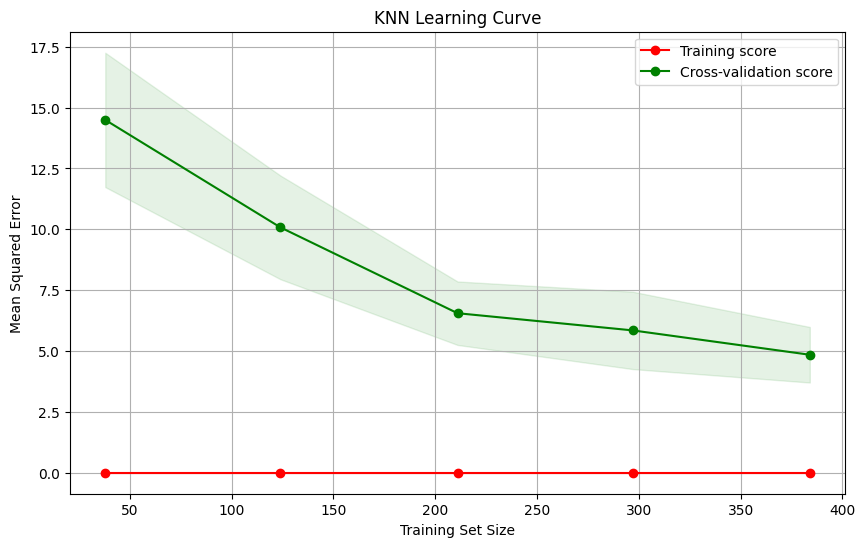

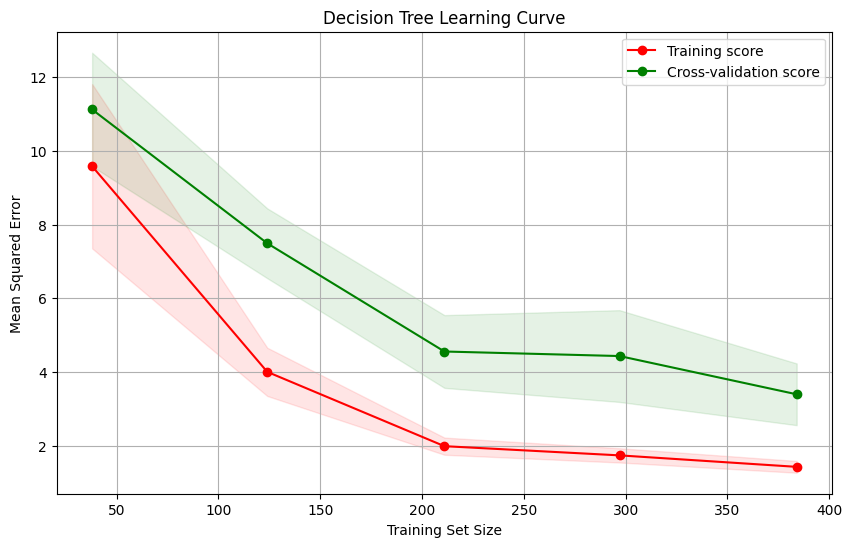

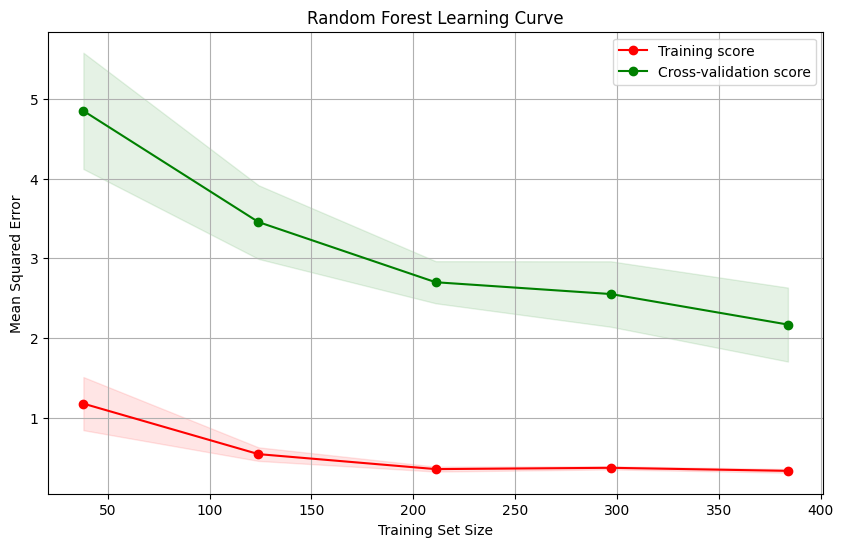

In [138]:
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, -train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, -val_mean, 'o-', color="g", label="Cross-validation score")

    plt.fill_between(train_sizes, -train_mean - train_std, -train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, -val_mean - val_std, -val_mean + val_std, alpha=0.1, color="g")

    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Example for KNN
plot_learning_curve(knn_best, X_train, y_train, title="KNN Learning Curve")

# Example for Decision Tree
plot_learning_curve(tree_best, X_train, y_train, title="Decision Tree Learning Curve")

# Example for Random Forest
plot_learning_curve(forest_best, X_train, y_train, title="Random Forest Learning Curve")

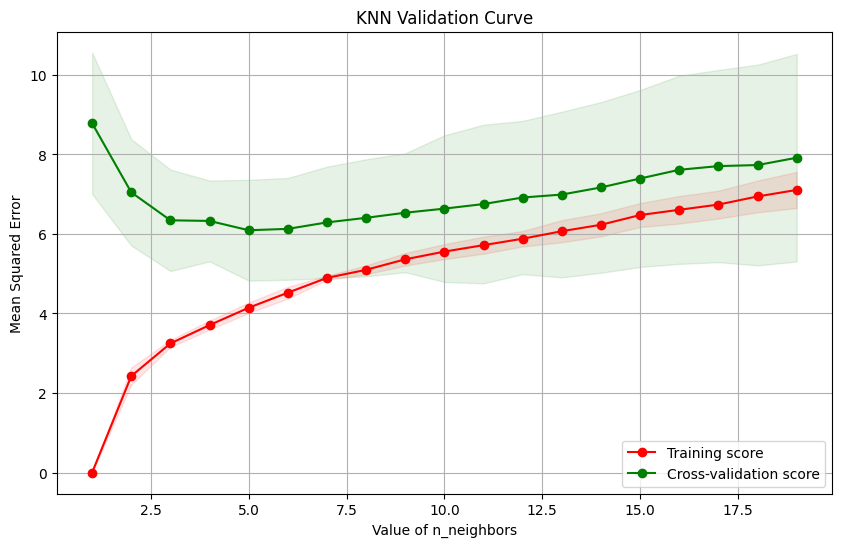

In [139]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, X, y, param_name, param_range, title="Validation Curve"):
    train_scores, val_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, -train_mean, 'o-', color="r", label="Training score")
    plt.plot(param_range, -val_mean, 'o-', color="g", label="Cross-validation score")

    plt.fill_between(param_range, -train_mean - train_std, -train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(param_range, -val_mean - val_std, -val_mean + val_std, alpha=0.1, color="g")

    plt.title(title)
    plt.xlabel(f"Value of {param_name}")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Example for KNN (validating `n_neighbors`)
plot_validation_curve(KNeighborsRegressor(), X_train, y_train, param_name="n_neighbors", param_range=range(1, 20), title="KNN Validation Curve")

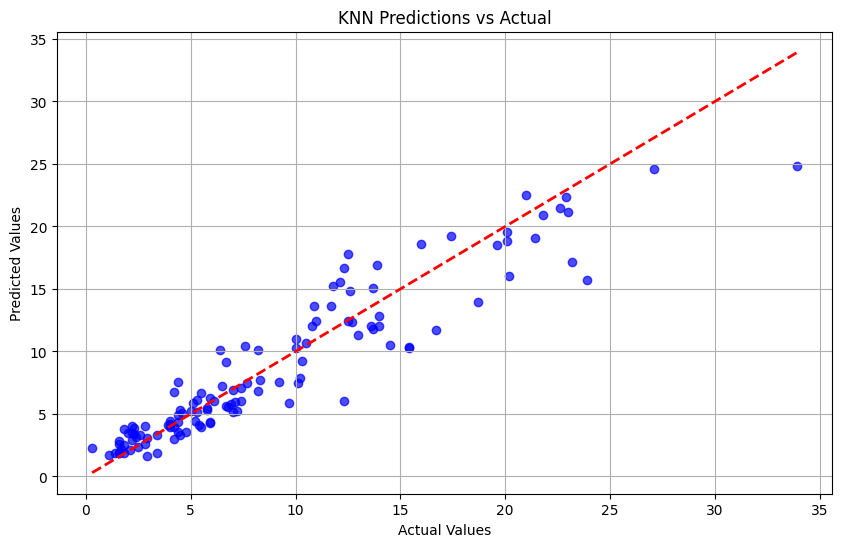

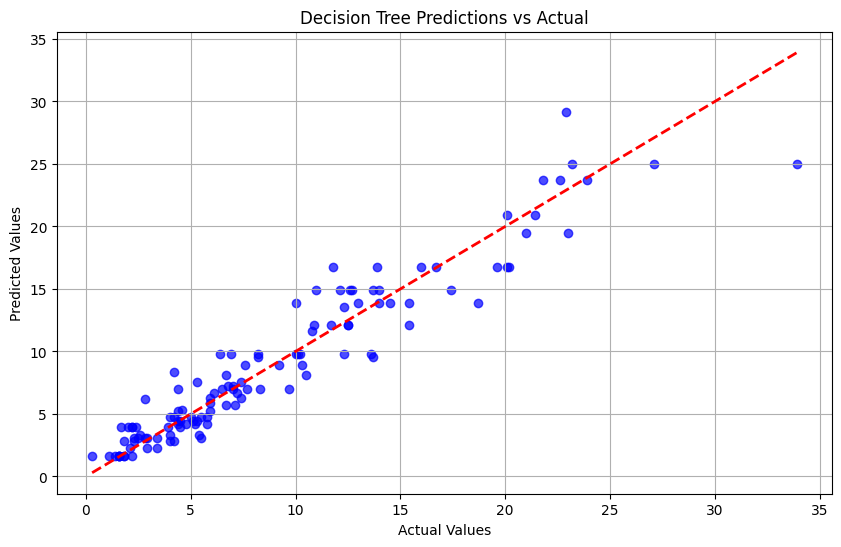

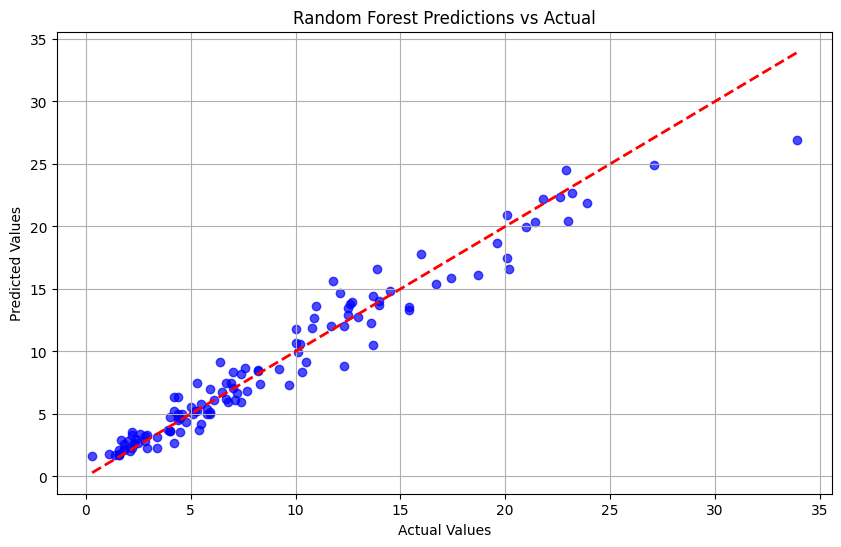

In [140]:
def plot_predictions_vs_actual(y_test, y_pred, title="Predictions vs Actual"):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color="b")  # scatter plot
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect fit line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.grid()
    plt.show()

# Example for KNN
plot_predictions_vs_actual(y_test, y_pred_knn, title="KNN Predictions vs Actual")

# Example for Decision Tree
plot_predictions_vs_actual(y_test, y_pred_tree, title="Decision Tree Predictions vs Actual")

# Example for Random Forest
plot_predictions_vs_actual(y_test, y_pred_forest, title="Random Forest Predictions vs Actual")